In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()



Saving api_data_aadhar_enrolment.zip to api_data_aadhar_enrolment.zip


In [4]:
import zipfile

with zipfile.ZipFile('/content/api_data_aadhar_enrolment.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/enrollment')


In [5]:
import os
os.listdir('/content/enrollment')

['api_data_aadhar_enrolment']

In [6]:
os.listdir('/content/enrollment/api_data_aadhar_enrolment')


['api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [7]:
import pandas as pd

# CSV file paths
files = [
    '/content/enrollment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv',
    '/content/enrollment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv',
    '/content/enrollment/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv'
]

# Merge all files
df_list = [pd.read_csv(f) for f in files]
enrollment_df = pd.concat(df_list, ignore_index=True)

# Quick check
enrollment_df.shape



(1006029, 7)

In [8]:
# 1️⃣ State Cleaning
enrollment_df['State'] = enrollment_df['State'].str.strip().str.title()

# Optional: replace known inconsistencies (example)
state_mapping = {
    'Jammu Kashmir': 'Jammu & Kashmir',
    'Delhi ': 'Delhi'
    # Add more if needed later
}
enrollment_df['State'] = enrollment_df['State'].replace(state_mapping)

# 2️⃣ Total Enrollment Column
# Assuming columns: '0-5', '5-17', '18+' (replace with your column names exactly)
enrollment_df['Total_Enrollment'] = enrollment_df.iloc[:, -3:].sum(axis=1)

# Quick check
enrollment_df.head()


KeyError: 'State'

In [9]:
enrollment_df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [10]:
# 1️⃣ Clean state names
enrollment_df['state'] = enrollment_df['state'].str.strip().str.title()

# Optional mapping for known fixes
state_mapping = {
    'Jammu Kashmir': 'Jammu & Kashmir',
    'Delhi ': 'Delhi'
}
enrollment_df['state'] = enrollment_df['state'].replace(state_mapping)

# 2️⃣ Create Total Enrollment Column
enrollment_df['Total_Enrollment'] = enrollment_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)

# Quick check
enrollment_df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,Total_Enrollment
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,51


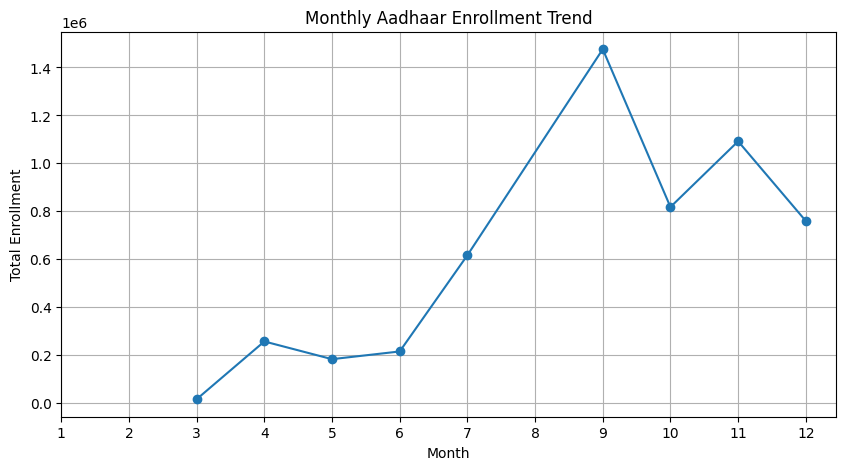

In [11]:
# Convert 'date' column to datetime
enrollment_df['date'] = pd.to_datetime(enrollment_df['date'], format='%d-%m-%Y')

# Extract Month
enrollment_df['Month'] = enrollment_df['date'].dt.month

# Group by Month and sum Total Enrollment
monthly_trend = enrollment_df.groupby('Month')['Total_Enrollment'].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_trend.plot(kind='line', marker='o')
plt.title('Monthly Aadhaar Enrollment Trend')
plt.xlabel('Month')
plt.ylabel('Total Enrollment')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


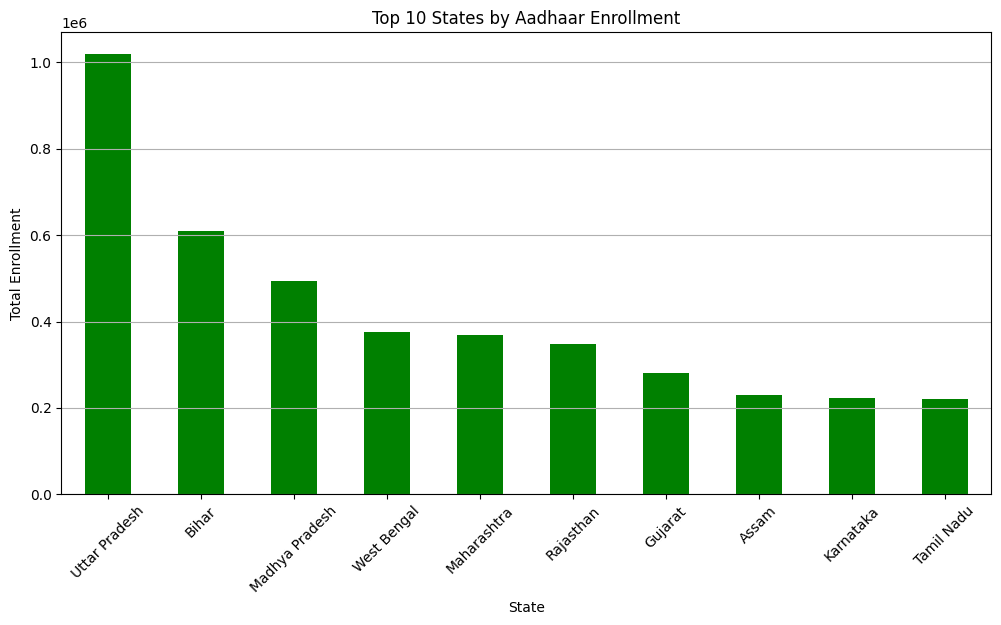

In [12]:
# Group by state and sum total enrollment
state_trend = enrollment_df.groupby('state')['Total_Enrollment'].sum().sort_values(ascending=False)

# Top 10 states
top10_states = state_trend.head(10)

# Plot
plt.figure(figsize=(12,6))
top10_states.plot(kind='bar', color='green')
plt.title('Top 10 States by Aadhaar Enrollment')
plt.xlabel('State')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [13]:
# Top 5 states by total enrollment
top5_states = state_trend.head(5).index.tolist()


In [14]:
top5_df = enrollment_df[enrollment_df['state'].isin(top5_states)]


In [15]:
age_group_sum = top5_df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()
age_group_sum


,age_0_5,age_5_17,age_18_greater
state,,,
Bihar,262875,334802,11908
Madhya Pradesh,367990,116381,9599
Maharashtra,278814,82116,8209
Uttar Pradesh,521045,479682,17902
West Bengal,275400,91398,8510


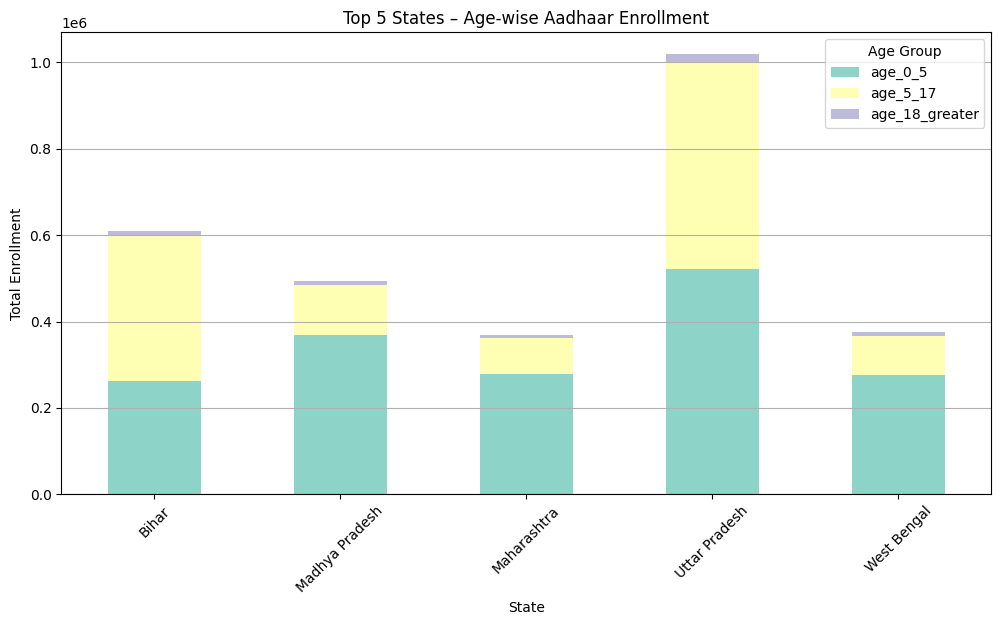

In [16]:
age_group_sum.plot(kind='bar', stacked=True, figsize=(12,6), color=['#8dd3c7','#ffffb3','#bebada'])
plt.title('Top 5 States – Age-wise Aadhaar Enrollment')
plt.xlabel('State')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.show()
